In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
from scipy import stats

register_matplotlib_converters()

REGEX = re.compile(r'(\d+(\.\d+)?)/10')

In [70]:
def to_timestamp(date):
    return date.timestamp()

def to_date(date):
    return (date.date().month, date.date().year)

def to_year(date):
    return date.date().year

def to_month(date):
    return date.date().month

def extract_rating(text):
    m = re.search(REGEX, text)
    return float(m.group(0)[:-3]) if m else None


In [109]:
average = pd.DataFrame()
average['year'] = data['created_at'].apply(to_year)
average['month'] = data['created_at'].apply(to_month)
average['rating'] = data['rating']

average = average.groupby(['year', 'month'], as_index=False).mean()
# average

all_avg = data[['created_at', 'rating']]
all_avg = all_avg.groupby('created_at').mean()
all_avg.resample('M').mean().dropna()

all_avg.reset_index()


# all_avg.resample('M').mean()
# plt.figure(figsize=(10, 5))
# plt.xticks(rotation=25)
# plt.xlabel('Dates')
# plt.title('WeRateDogs dog ratings, Jan, 2016 - May, 2019')
# plt.ylabel('Average ratings')
# plt.hist(all_avg['created_at'][0], all_avg['rating'], 'b-', alpha=0.5)
# plt.show()

,rating
created_at,
2016-02-14 16:33:40,10.0
2016-02-14 19:35:46,11.0
2016-02-14 21:55:47,13.0
2016-02-15 01:05:02,13.0
2016-02-15 02:38:53,12.0
2016-02-15 03:27:04,12.0
2016-02-15 03:55:41,8.0
2016-02-15 04:31:20,3.0
2016-02-15 20:04:36,10.0


In [10]:
fit.slope, fit.intercept



(3.515929974847721e-08, -40.46415480898916)

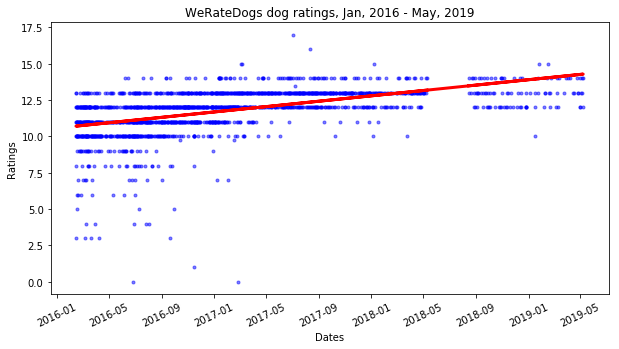

In [60]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=25)
plt.xlabel('Dates')
plt.title('WeRateDogs dog ratings, Jan, 2016 - May, 2019')
plt.ylabel('Ratings')
plt.plot(data['created_at'], data['rating'], 'b.', alpha=0.5)
plt.plot(data['created_at'], data['prediction'], 'r-', linewidth=3)
plt.show()


In [7]:
fit.pvalue

1.5139606492959894e-106

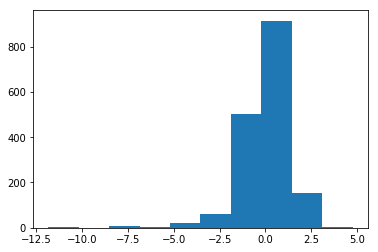

In [76]:
plt.hist(data['rating'] - data['prediction'])
plt.show()

In [81]:
above_ten = data[data['rating'] >= 10]
above_ten_avg = above_ten.groupby([above_ten.created_at.dt.year, above_ten.created_at.dt.month])['rating'].mean()
all_avg = data.groupby([data.created_at.dt.year, data.created_at.dt.month])['rating'].mean()
above_ten = data[data['rating'] >= 10]
above_ten_avg = above_ten.groupby([above_ten.created_at.dt.year, above_ten.created_at.dt.month])['rating'].mean()

In [83]:
all_avg

created_at  created_at
2016        2             10.318182
            3             10.582090
            4             10.737705
            5             10.898305
            6             10.432990
            7             10.922330
            8             11.066667
            9             11.256098
            10            11.787037
            11            11.674419
            12            11.828125
2017        1             12.214286
            2             11.923913
            3             12.456140
            4             12.625000
            5             12.658537
            6             12.720930
            7             12.967391
            8             12.865385
            9             12.825000
            10            12.771429
            11            12.896552
            12            12.709677
2018        1             12.692308
            2             12.687500
            3             12.900000
            4             12.920000
     

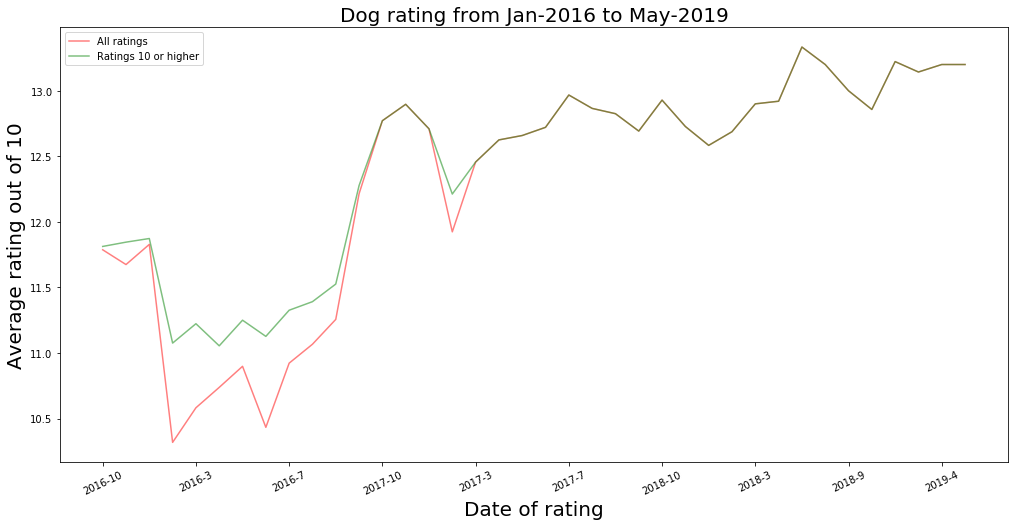

In [133]:
data['YearMonth'] = pd.to_datetime(data['created_at']).map(lambda dt: str(dt.date().year) + '-' + str(dt.date().month))
all_avg = data.groupby('YearMonth', as_index=False)['rating'].mean()
above_ten = data[data['rating'] >= 10]
above_ten_avg = above_ten.groupby('YearMonth', as_index=False)['rating'].mean()
plt.figure(figsize=(17,8))
plt.xticks(rotation=25)
plt.plot(all_avg['YearMonth'], all_avg['rating'], 'r-', alpha=0.5)
plt.plot(above_ten_avg['YearMonth'], above_ten_avg['rating'], 'g-', alpha=0.5)

plt.xlabel('Date of rating', size=20)
plt.ylabel('Average rating out of 10', size=20)
plt.xticks(np.arange(0, 40, step=4))
plt.legend(['All ratings' ,'Ratings 10 or higher'])
plt.title('Dog rating from Jan-2016 to May-2019', fontsize=20)
plt.show()